**RELACIÓN PRECIO-CABALLOS EN LOS COCHES DE 2022 LANZADOS EN USA**

En éste proyecto pretendo analizar los nuevos coches lanzados al mercado durante el 2022.
Y de ésta manera descubrir si existe una relación CV-Precio. Es decir si los caballos de ptencia están relacionados con la subida y bajada de precio.

In [1]:
#Importamos librerías

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stats
import sklearn.metrics as metrics
from statsmodels.graphics.gofplots import qqplot

from functions import *

np.random.seed(42)

Para poder realizar el estudio he conseguido una BBDD de los lanzammientos de vehiculos en los Estados Unidos durante el 2022.
Esta Base de Datos la conseguí de Kaggle. Aquí os la dejo: https://www.kaggle.com/datasets/tymekurban/new-cars-usa-202223-dataset?resource=download

In [2]:
#Creamos un DataFrame de el precio de los coches nuevos que salieron en US durante el 2022.
df=pd.read_csv("cars_us_2022.csv")


In [3]:
#Mostramos las 5 primeras filas
df.head(5)

,Unnamed: 0,Brand,Model.Number,Price,Photo,Engine.Type,Body.Type,Fuel.Type,Gearbox.Type,Power.hp,...,CD.Player,DVD.Player,Electric.Adjustable.Seats,Keyless.Entry,Tyre.Pressure.Monitor,Smart.Access.Card.Entry,Xenon.Headlamps,Halogen.Headlamps,Removable.Convertible.Top,Cassette.Player
0,1,Honda,Accord Hybrid Sport-L 2023,31670.0,https://www.ccarprice.com/products/Honda_Accor...,2.0L Inline-4 Hybrid,Sedan,Hybrid,CVT,204.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Honda,Accord Sedan 2023,28000.0,https://www.ccarprice.com/products/Honda_Accor...,1.5L Turbo Inline-4 Gas,Sedan,Petrol,CVT,192.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Honda,ZR-V 2023,25000.0,https://www.ccarprice.com/products/Honda_ZRV_2...,2.0L Inline-4,SUV,Petrol,CVT,158.0,...,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Honda,HR-V VTi-S 2022,27800.0,https://www.ccarprice.com/products/Honda_HR-V_...,2.0L Inline-4 Gas,SUV,Petrol,CVT,119.0,...,NaN,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Honda,HR-V VTi 2022,26900.0,https://www.ccarprice.com/products/Honda_HR-V_...,2.0L Inline-4 Gas,SUV,Petrol,CVT,119.0,...,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Limpìamos el DataFrame dejando simplemente lo que nos interesa:
# --- Brand, para saber la marca ya que vamos a hacer las visualizaciones y las comparaciones por marca.
# --- Model, para diferenciar los distintos modelos.
# --- Price, que será nuestra variable Y con la que nos basaremos en el estudio.
# --- Power.hp, que será nuestra variable X para ver si a más caballos más aumenta el precio.
# --- Fuel.Type, por si vemos que el modelo presenta unas respuestas raras por si se debe al tipo de Fuel.

df = df[['Brand','Model.Number','Price','Fuel.Type','Power.hp']]

Nuestro FataFrame limpio quedaría de la siguiente manera:

In [5]:
df

,Brand,Model.Number,Price,Fuel.Type,Power.hp
0,Honda,Accord Hybrid Sport-L 2023,31670.0,Hybrid,204.0
1,Honda,Accord Sedan 2023,28000.0,Petrol,192.0
2,Honda,ZR-V 2023,25000.0,Petrol,158.0
3,Honda,HR-V VTi-S 2022,27800.0,Petrol,119.0
4,Honda,HR-V VTi 2022,26900.0,Petrol,119.0
...,...,...,...,...,...
2597,Changan,CX70T 2021,37000.0,Petrol,147.0
2598,Changan,Alsvin V7 Comfort,10070.0,Petrol,122.0
2599,Changan,CS75 F,20410.0,Petrol,175.0
2600,Changan,CS35 L,16330.0,Petrol,123.0


In [6]:
#Creamos la variable brands que nos mostrará las marcas que hay en el DataFrame
brands=df['Brand'].unique()
brands

array(['Honda', 'BMW', 'Lexus', 'Hyundai', 'Toyota', 'KIA', 'Nissan',
       'Audi', 'Chevrolet', 'Ford', 'Mercedes', 'Porsche', 'Infiniti',
       'Jaguar', 'Cadillac', 'Land Rover', 'Jeep', 'Volkswagen',
       'Maserati', 'Subaru', 'Dodge', 'Mazda', 'Chrysler', 'Aston Martin',
       'Ferrari', 'Lamborghini', 'Bugatti', 'Bentley', 'Rolls Royce',
       'Mclaren', 'Lincoln', 'Alfa Romeo', 'Volvo', 'MINI', 'Fiat',
       'Acura', 'Genesis', 'Buick', 'GMC', 'Tesla', 'Rimac', 'Koenigsegg',
       'Lotus', 'Renault', 'Suzuki', 'MG', 'Skoda', 'JAC', 'Proton',
       'Changan'], dtype=object)

In [7]:
#Comprobamos que separados por marcas podemos elegir cualquier marca y nos muestra los modelos lanzados en el 2022.
Nissan=df[(df.Brand == 'Nissan')]
Nissan

,Brand,Model.Number,Price,Fuel.Type,Power.hp
360,Nissan,Z GT4 2023,229000.0,Petrol,442.0
361,Nissan,GT-R Premium 2023,113540.0,Petrol,565.0
362,Nissan,GT-R 2023,113540.0,Petrol,565.0
364,Nissan,350Z 2023,37890.0,Petrol,400.0
365,Nissan,350Z 2022,34990.0,Petrol,400.0
366,Nissan,Juke 2023,17700.0,Petrol,114.0
367,Nissan,Ariya EV 2023,43190.0,Electric,215.0
368,Nissan,Z GT4 Nismo 2023,210900.0,Petrol,600.0
369,Nissan,Note e Power 2022,123800.0,Unknown,113.0
370,Nissan,Sentra 2022,19750.0,Petrol,149.0


Vamos a visualizar los lanzamientos de las marcas.

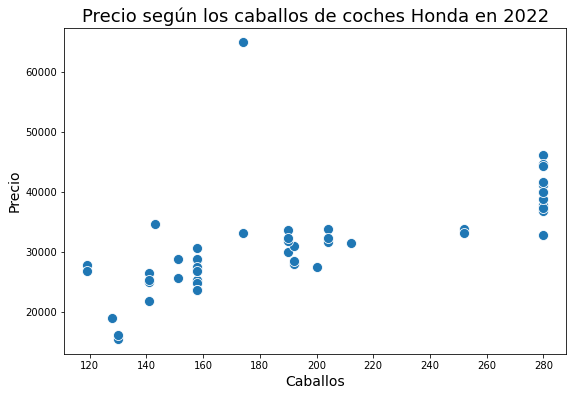

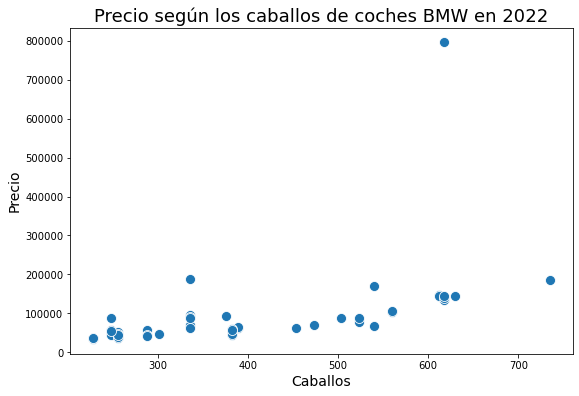

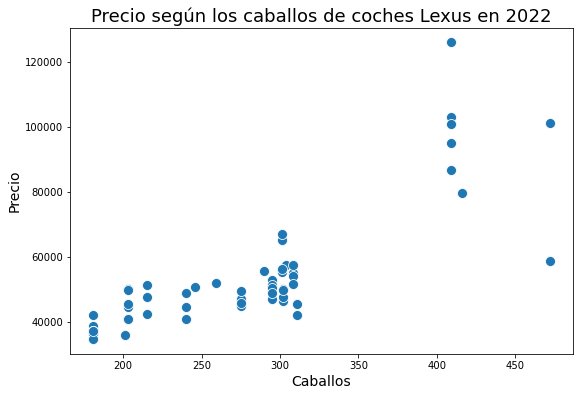

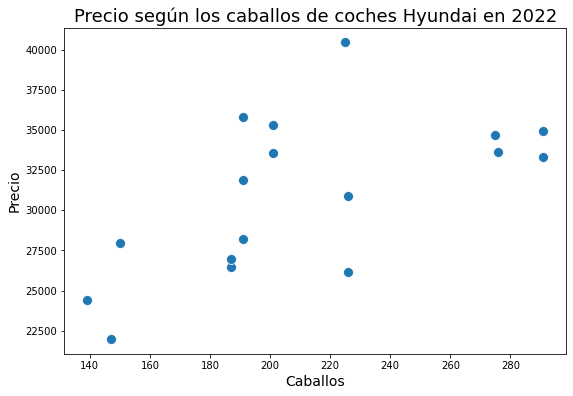

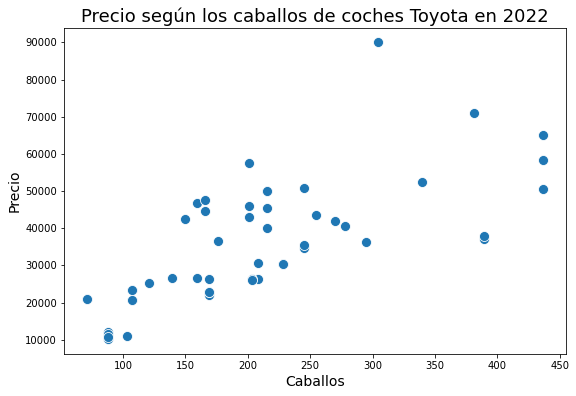

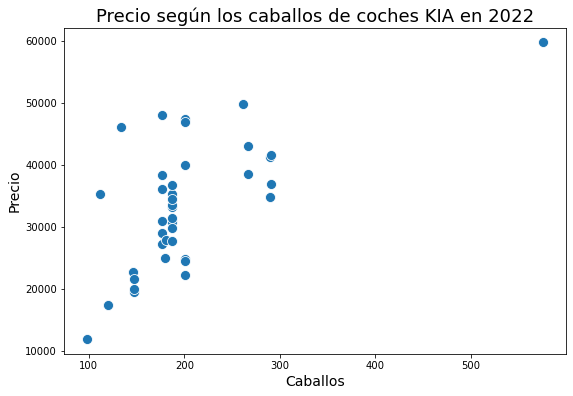

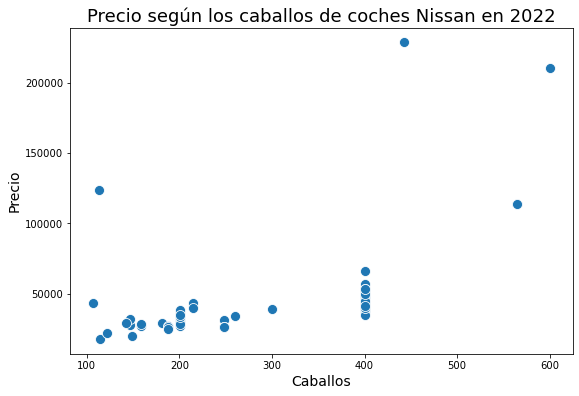

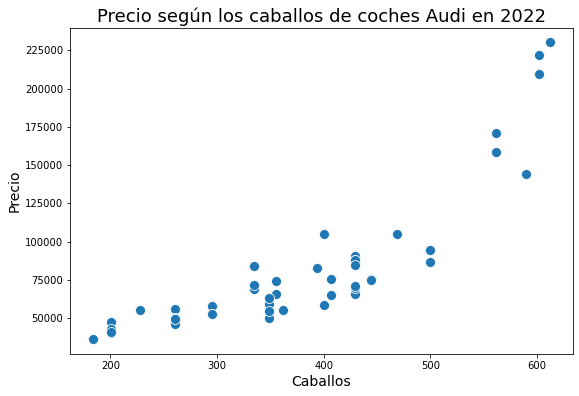

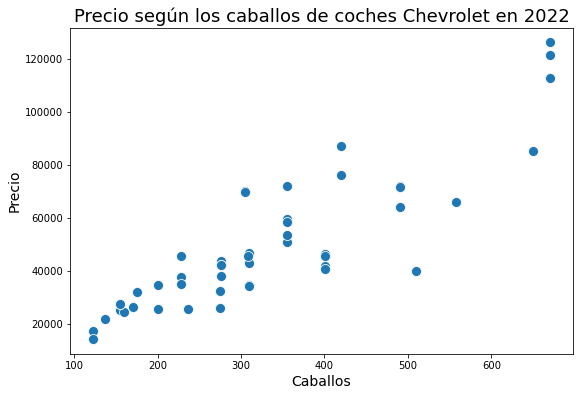

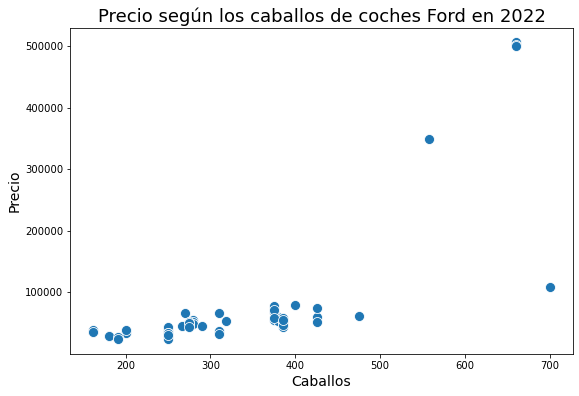

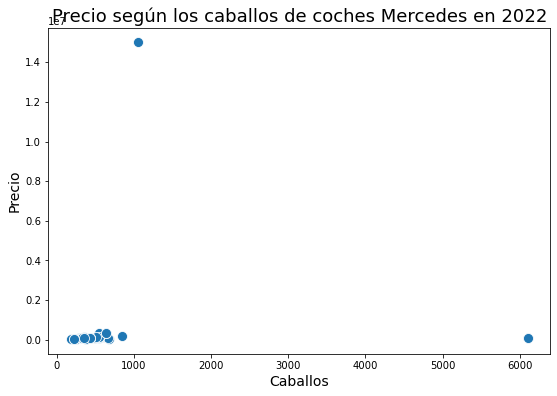

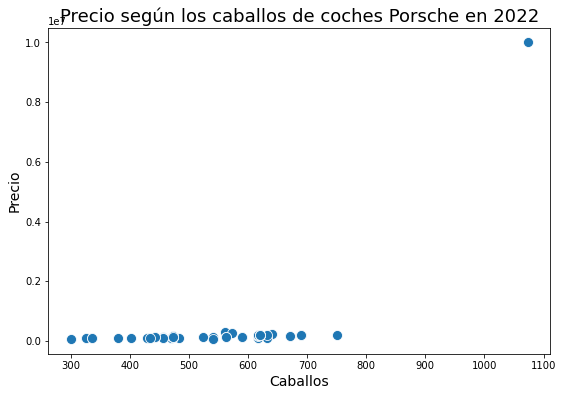

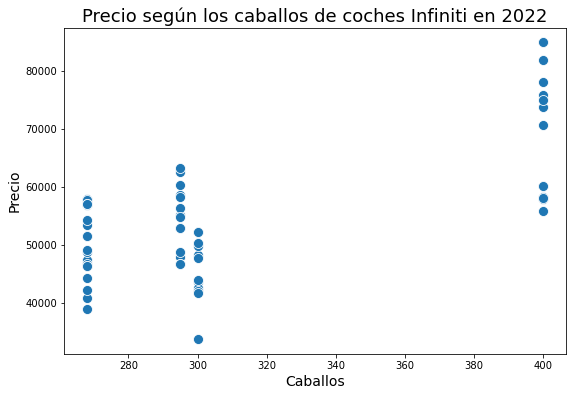

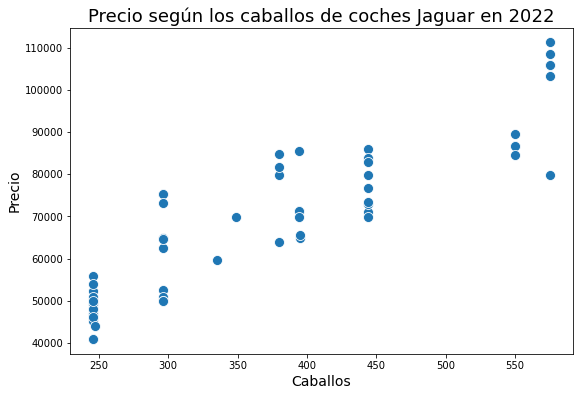

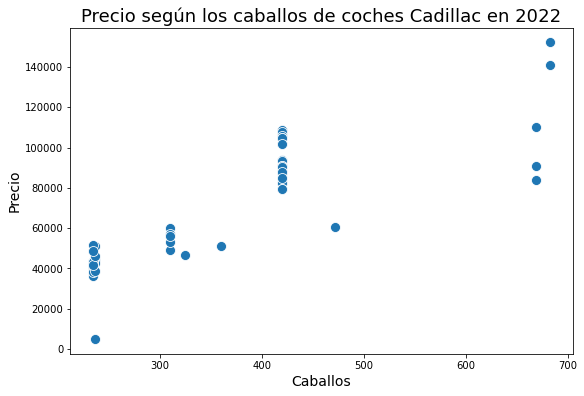

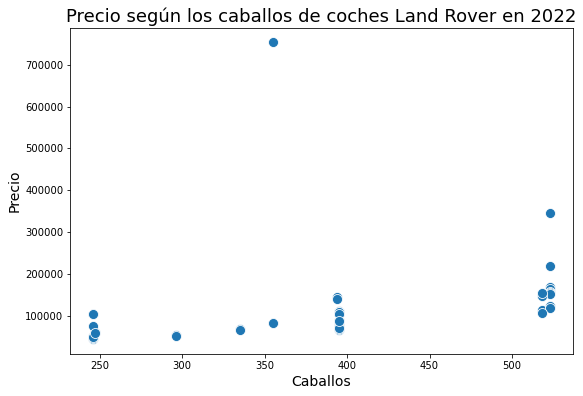

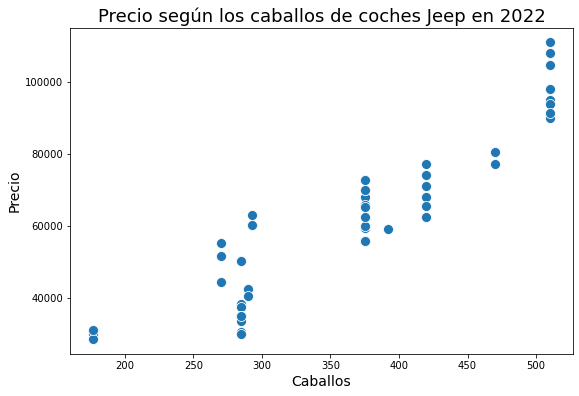

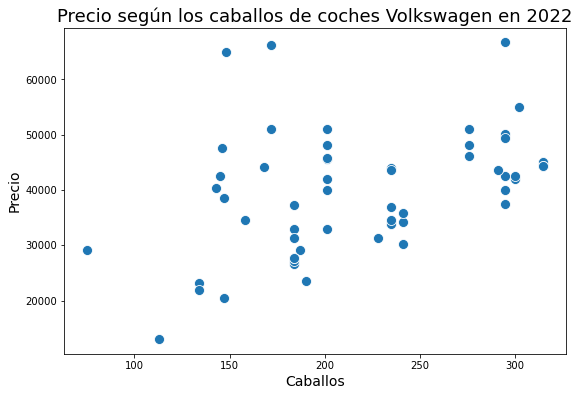

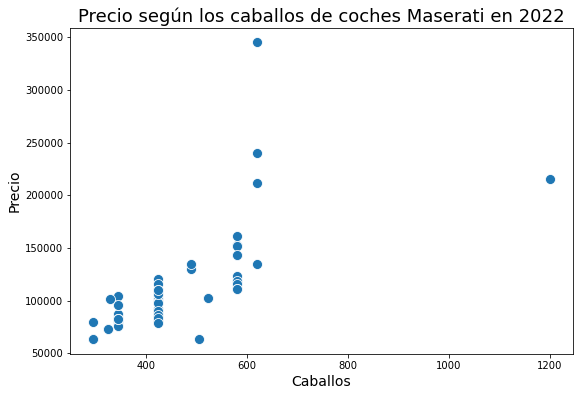

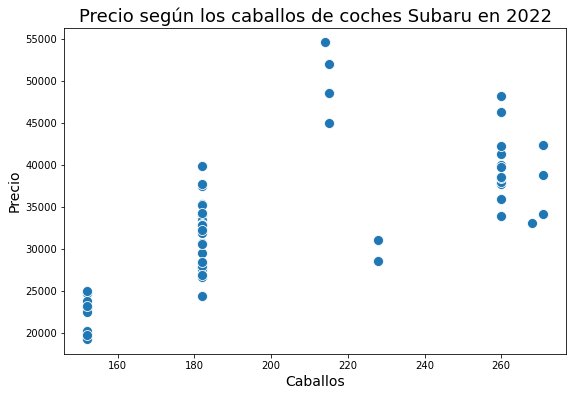

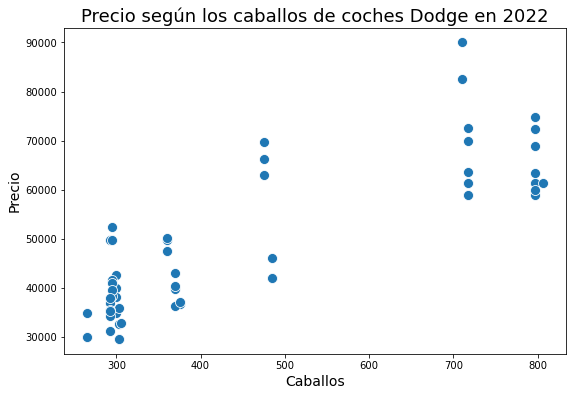

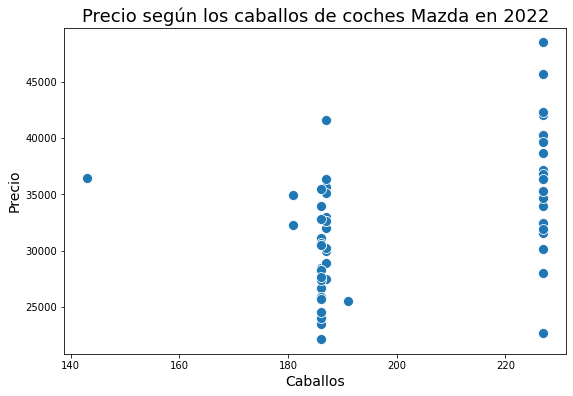

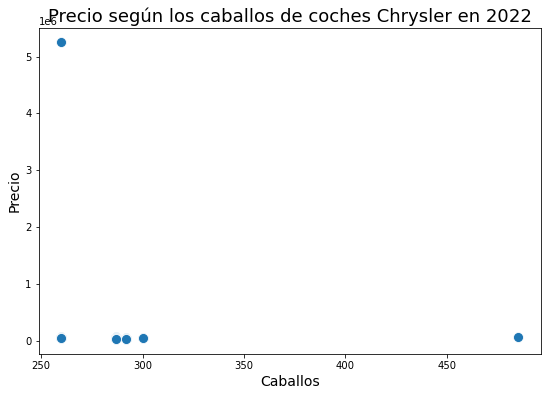

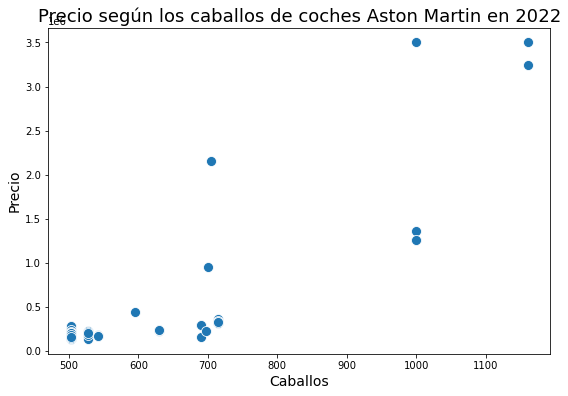

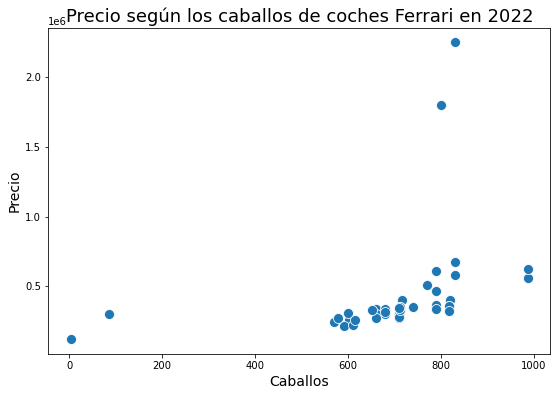

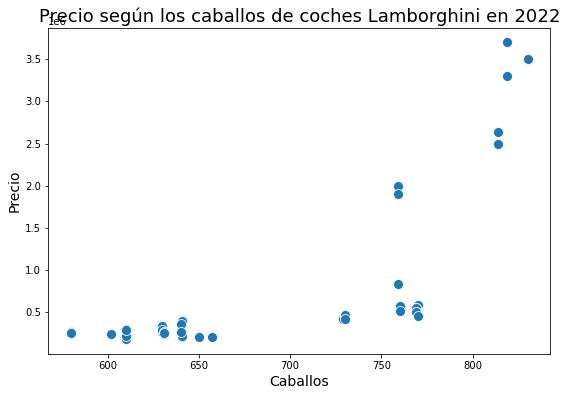

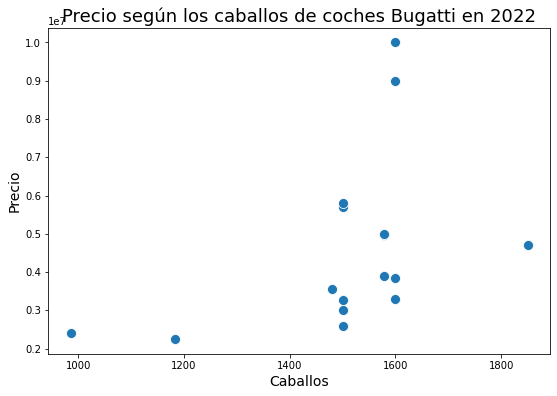

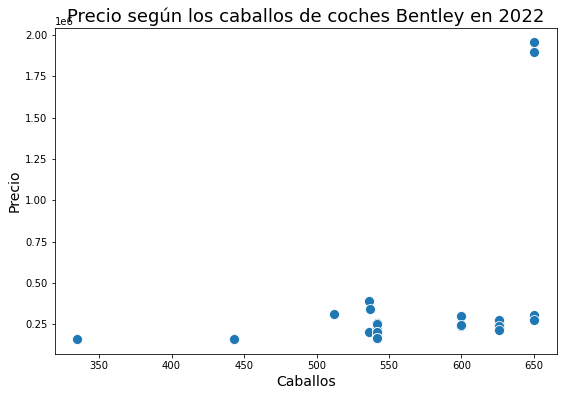

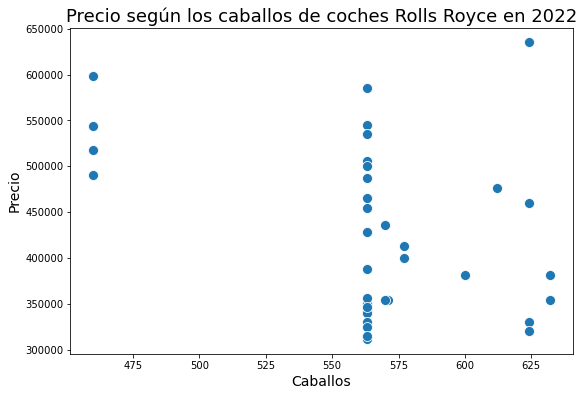

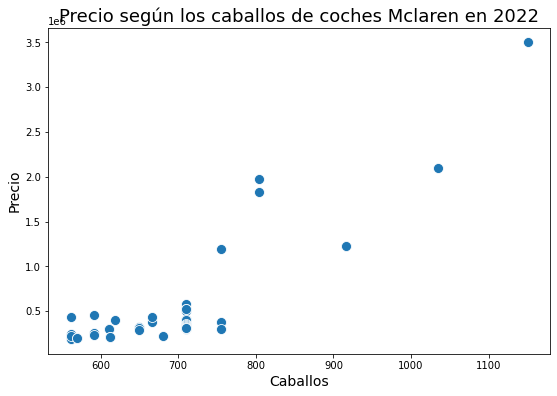

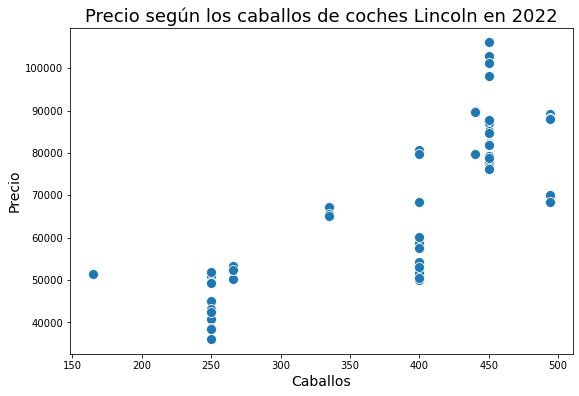

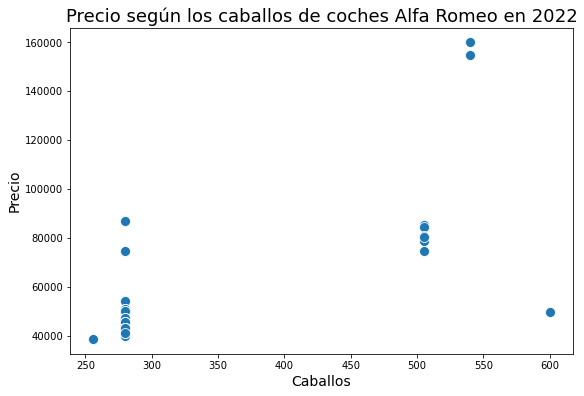

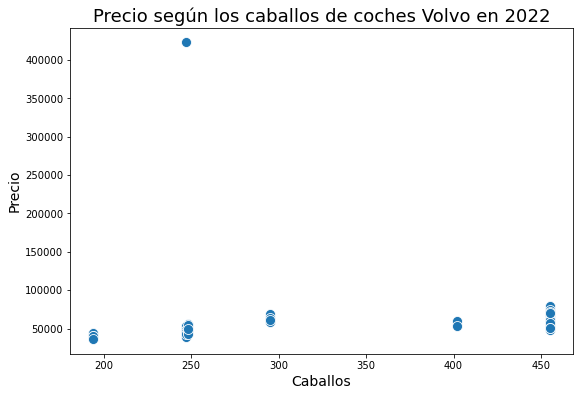

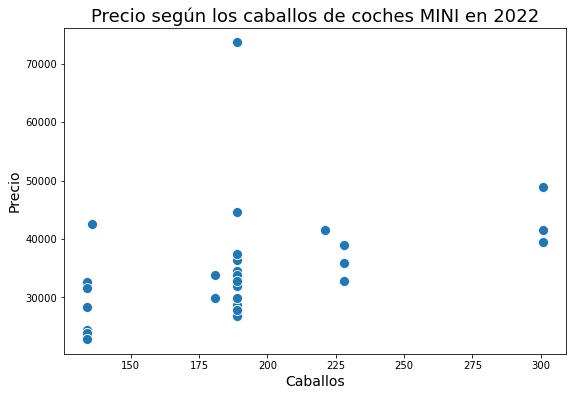

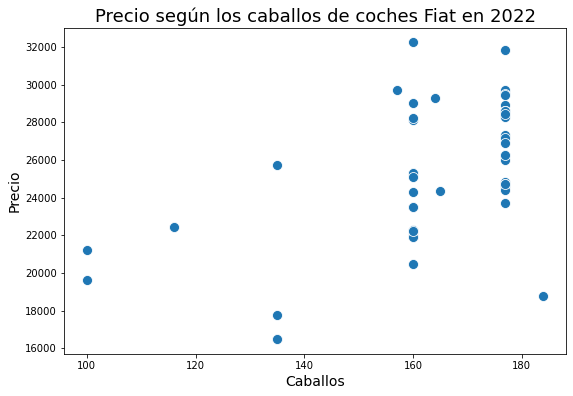

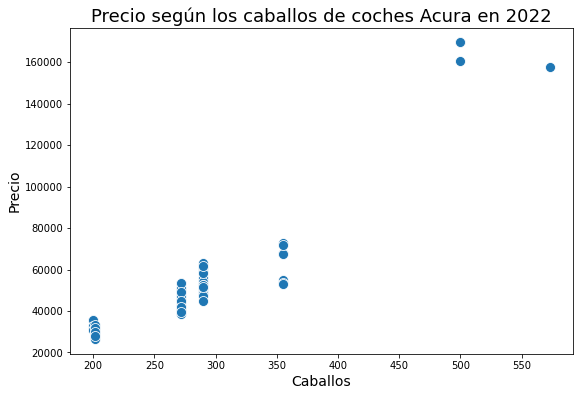

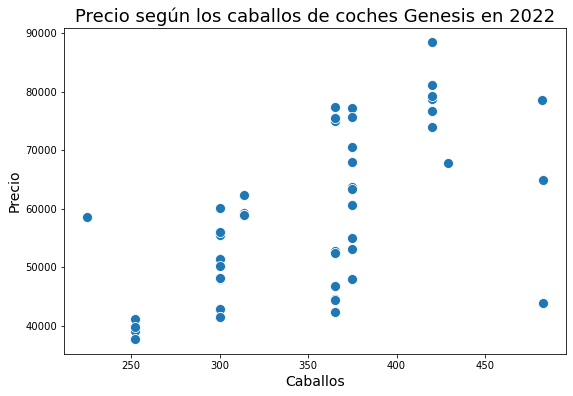

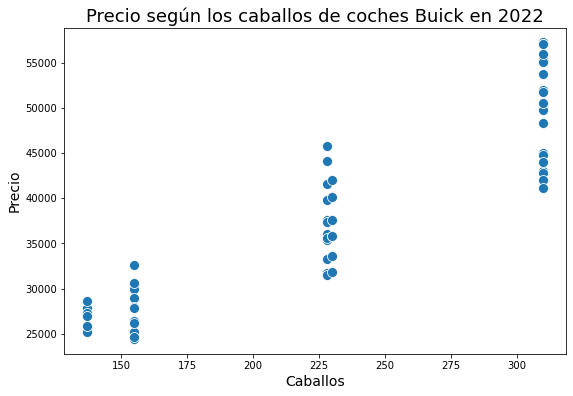

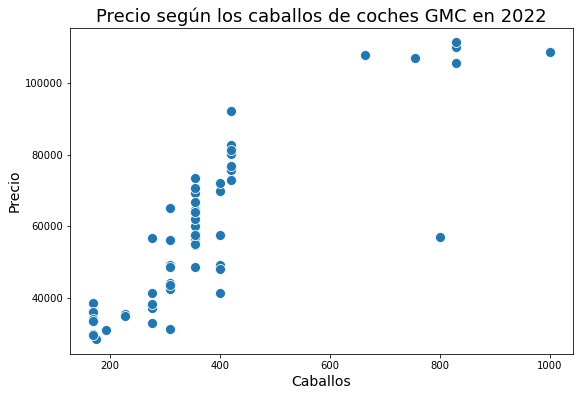

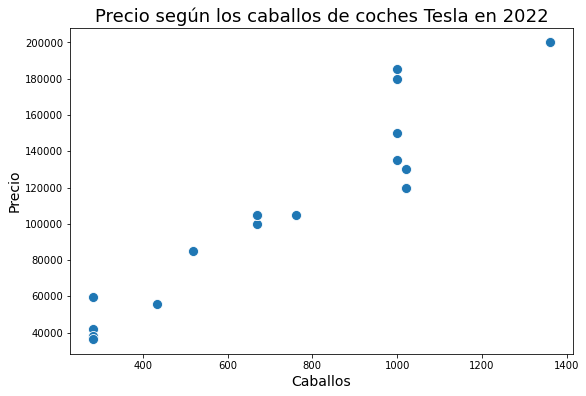

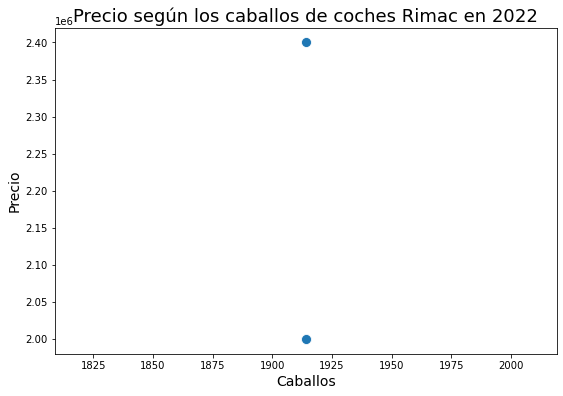

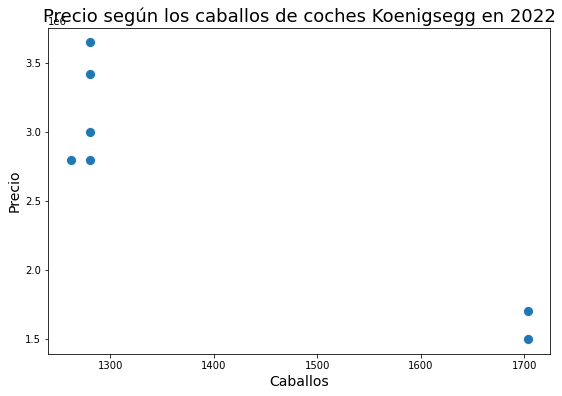

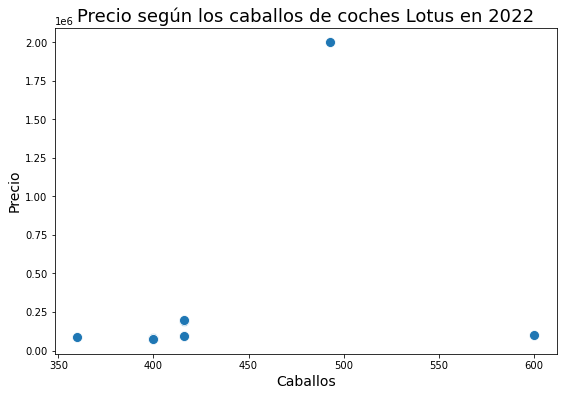

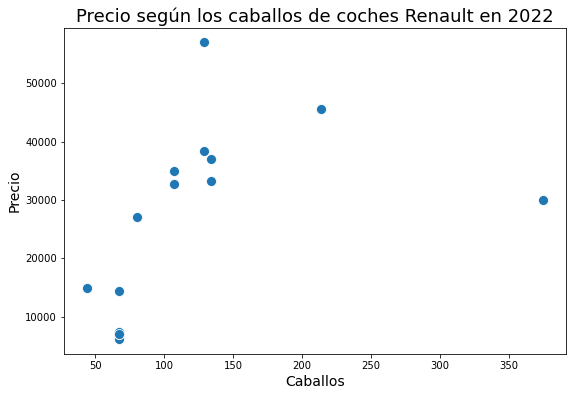

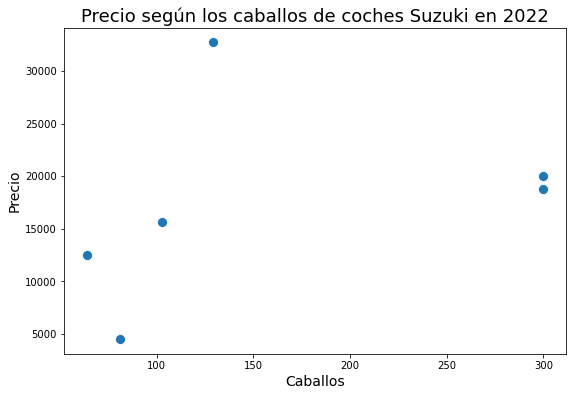

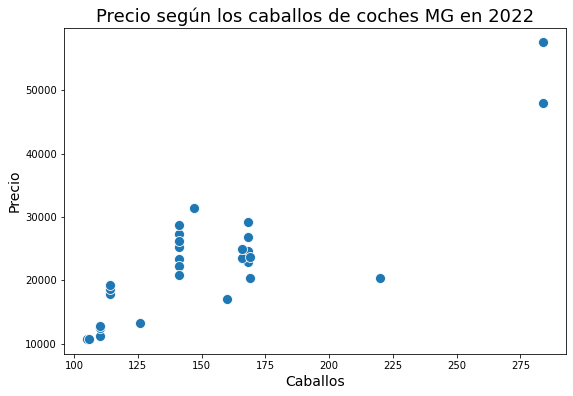

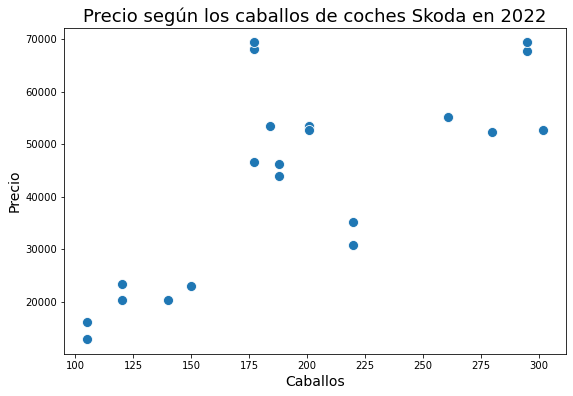

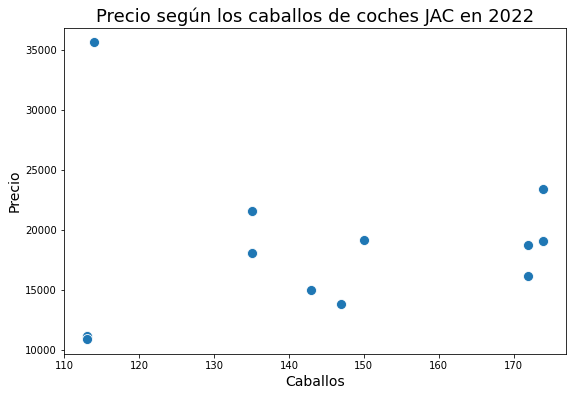

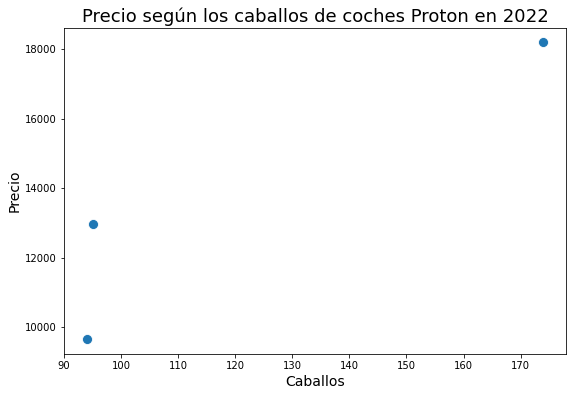

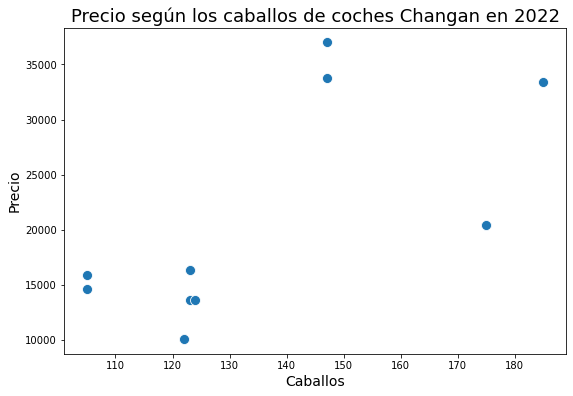

In [9]:
#Vamos a visualizar un grafico para cada marca. 
#Estos graficos muestran cada modelo, el eje de las X representa los caballos, el de la Y el precio.
for i in brands:
    scattergraph(df[(df.Brand == i)],'Power.hp','Price',i)

Una vez observados todos los graficos de cada marca vemos que en algunas sí se aprecio una posible relación Caballos-Precio.

Vamos a seleccionar algunas marcas y aplicarle un modelo de Regresión lineal para ver si cumplen con lo que estámos buscando.

Nos quedamos con la marca Jaguar y vamos a empezar a crear la Regresión lineal.

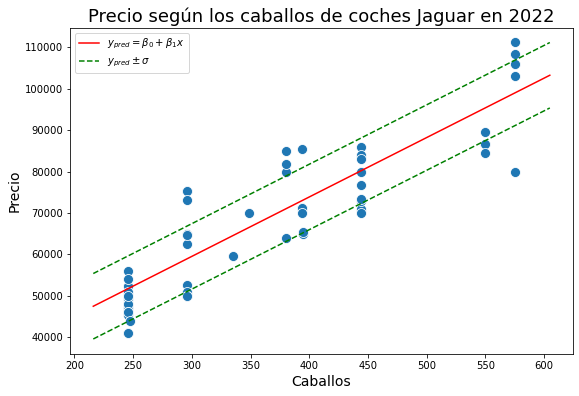

In [16]:
#Usaremos la función scattergraphregresion que nos va a crear la regresión y nos la va a mostrar.
scattergraphregresion(df[(df.Brand == 'Jaguar')],'Power.hp','Price','Jaguar')

Podemos observar que en Jaguar si se aprecia un aumento de precio en relación con los caballos

-------------------------------------------------------------------------------

Ahora probaremos con Chevrolet

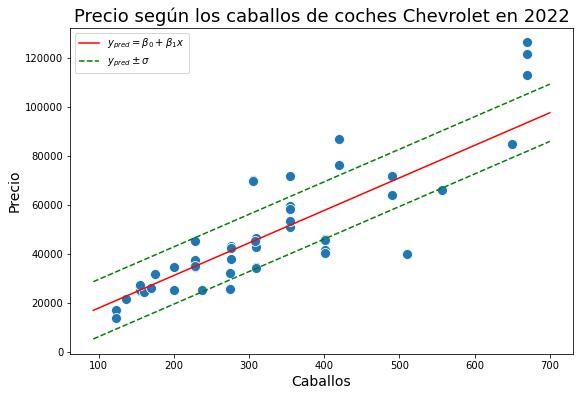

In [17]:
scattergraphregresion(df[(df.Brand == 'Chevrolet')],'Power.hp','Price','Chevrolet')

También muestra ese aumento más o menos equitativo en función a los caballos.

-----------------------------------------------------

Ahora vamos a probar con Ford. Que tenía una una repartición extraña.

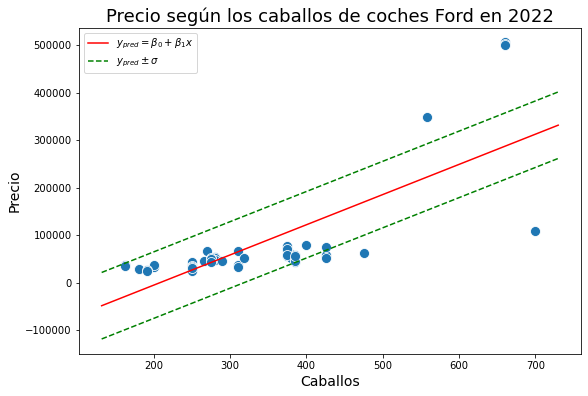

In [15]:
scattergraphregresion(df[(df.Brand == 'Ford')],'Power.hp','Price','Ford')

Hay un par de coches en Ford que destrozan nuestro grafico por completo. Son los llamados Outliers. 

Vamos a intentar repetir el gráfico pero ésta vez quitando los 4 modelos de Ford de más de 500 caballos.

In [38]:
#Guardamos todos los modelos de Ford en uuna variable llamada 'ford'.
ford=df[(df.Brand == 'Ford')]
ford.sort_values(by='Price',ascending=False).head(3)

,Brand,Model.Number,Price,Fuel.Type,Power.hp
567,Ford,GT LM Edition 2023,505750.0,Petrol,660.0
568,Ford,GT 2023,502300.0,Petrol,660.0
569,Ford,GT LM Edition 2022,500000.0,Petrol,660.0


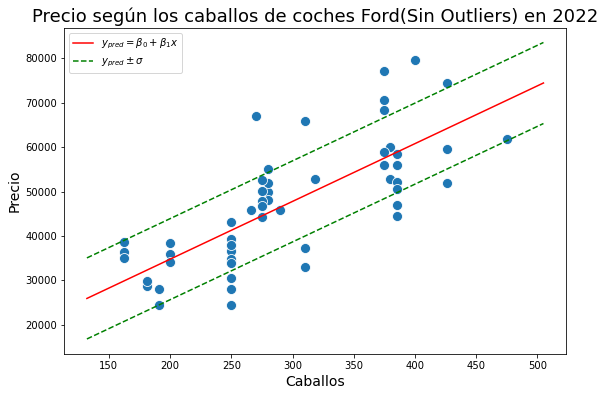

In [39]:
#Borramos todos los modelos que tengan más de 500 caballos y nos quedamos con el resto de modelos.
ford=ford[ford['Power.hp']<=500]
#repetimos la visualización
scattergraphregresion(ford,'Power.hp','Price','Ford(Sin Outliers)')


Vemos que ahora el gráfico tiene más sentido.

--------------------------------------------------------------------------

También con Tesla.

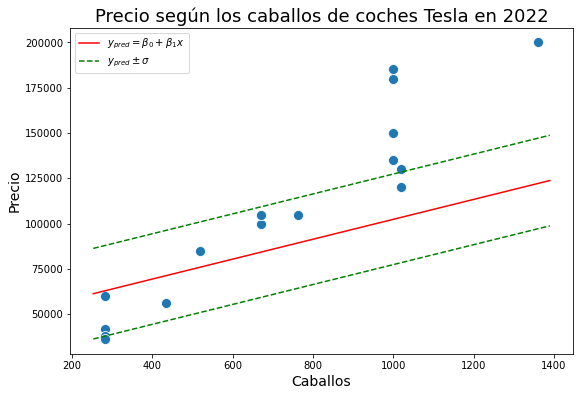

In [19]:
scattergraphregresion(df[(df.Brand == 'Tesla')],'Power.hp','Price','Tesla')

A partir de los 1000 Caballos el precio se dispara.

----------------------------------------------------------------------

Y por último con Audi.

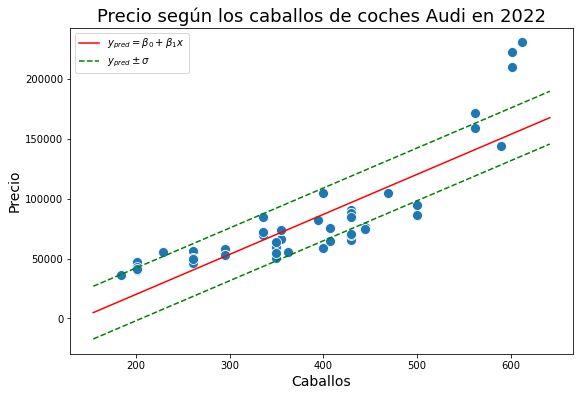

In [13]:
scattergraphregresion(df[(df.Brand == 'Audi')],'Power.hp','Price','Audi')

Con éstos gráficos podemos sacar nuestras propias conclusiones. Hay marcas que sí tienen una relación **Caballos-Precio** como puede ser el caso de Jaguar, Chevrolet, Ford o Audi. Pero sin embargo hay otras marcas que sus modelos no cumplen con ésta relación.